# Working with time-series in Pandas

## Analyze YouTube Data

In [1]:
import pandas as pd

In [2]:
# load the data
df = pd.read_csv(
    "https://pythonandvba.com/youtube-data.csv",
    usecols=["Video title", "Video publish time", "Views"],
)
df.sample(5)

,Video title,Video publish time,Views
14,Split Excel Data into Multiple Files by Column...,15-May-21,10331
100,PySimpleGUI Retrieve Data,NaN,182
13,How To Send Bulk SMS From Excel With TWILIO + ...,29-May-21,9781
98,How To Create An Interactive Population Pyrami...,24-Dec-20,2121
18,FREE Excel Add-in to Boost Your Productivity,6-Aug-21,7972


In [3]:
# get a quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Video title         107 non-null    object
 1   Video publish time  102 non-null    object
 2   Views               107 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [4]:
# clean the dataframe
(df
 .dropna()
 .assign(date=pd.to_datetime(df["Video publish time"]))
 .set_index("date")
 .sort_index()
).head()

,Video title,Video publish time,Views
date,,,
2020-07-05,📈 How To Get Stock Data In Excel By Using VBA ...,5-Jul-20,23304
2020-07-18,💻 How To Create A GUI In Python Using Tkinter ...,18-Jul-20,3058
2020-07-25,How To Create An Interactive Gantt Diagram In ...,25-Jul-20,15731
2020-07-27,How To Execute A Python Script From Excel Usin...,27-Jul-20,42471
2020-08-02,How To Create A Treemap & Sunburst Chart In Py...,2-Aug-20,6604


In [5]:
# convert the cleaning process into a function
def clean_data(df):
    return (
        df.dropna()
        .assign(date=pd.to_datetime(df["Video publish time"]))
        .set_index("date")
        .sort_index()
    )
clean_df = clean_data(df)
clean_df.head()

,Video title,Video publish time,Views
date,,,
2020-07-05,📈 How To Get Stock Data In Excel By Using VBA ...,5-Jul-20,23304
2020-07-18,💻 How To Create A GUI In Python Using Tkinter ...,18-Jul-20,3058
2020-07-25,How To Create An Interactive Gantt Diagram In ...,25-Jul-20,15731
2020-07-27,How To Execute A Python Script From Excel Usin...,27-Jul-20,42471
2020-08-02,How To Create A Treemap & Sunburst Chart In Py...,2-Aug-20,6604


<AxesSubplot:title={'center':'Time Series Analysis'}, xlabel='date'>

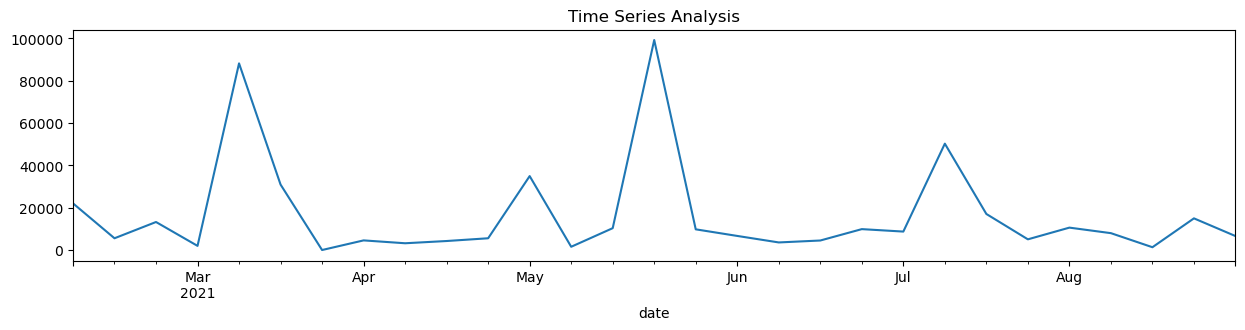

In [6]:
# Plot the data
(clean_df
 .Views
 .clip(upper=150_000)
 .loc["2021":]
 .loc["2021/2":"2021/8"]
 .resample("W")
#  .resample("M")
#  .resample("Q")
 .mean()
 .fillna(0)
#  .rolling(6)
#  .mean()
 .plot(kind='line', figsize=(15,3), title="Time Series Analysis")
)

## Simple Moving Average Example

In [7]:
# !pip install -U yfinance -q

In [8]:
import yfinance as yf

# get data from yfinance
data = yf.download(tickers="MSFT", period="3mo")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-08 00:00:00-04:00,264.790009,268.100006,263.290009,267.660004,267.093079,19658800
2022-07-11 00:00:00-04:00,265.649994,266.529999,262.179993,264.510010,263.949738,19455200
2022-07-12 00:00:00-04:00,265.880005,265.940002,252.039993,253.669998,253.132690,35868500
2022-07-13 00:00:00-04:00,250.190002,253.550003,248.110001,252.720001,252.184708,29497400
2022-07-14 00:00:00-04:00,250.570007,255.139999,245.940002,254.080002,253.541840,25102800


<AxesSubplot:title={'center':'SMA - 15 days'}, xlabel='Date'>

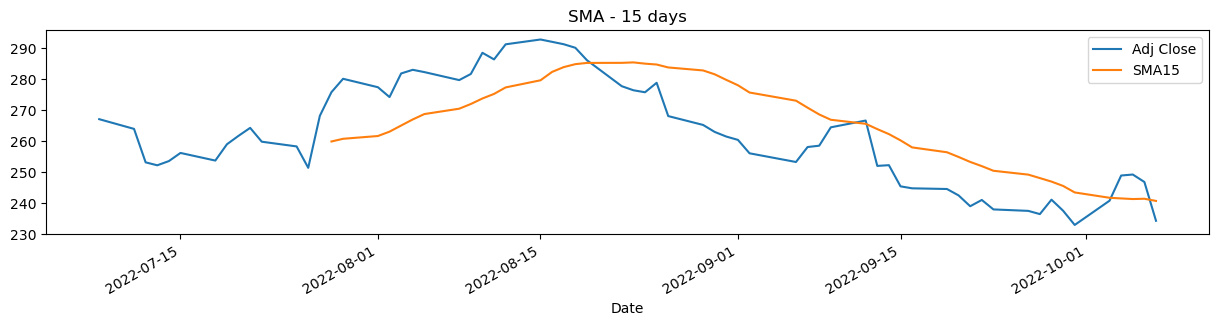

In [9]:
# plot adj close + simple moving average 15 days
(data
 .assign(SMA15=data["Adj Close"].rolling(window=15).mean())
 .filter(items=["Adj Close", "SMA15"])
 .plot(figsize=(15, 3), title="SMA - 15 days")
)